In [36]:
#Importing packages
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

pd.options.mode.chained_assignment = None  # default='warn'


pd.options.display.max_columns = 60
pd.options.display.max_rows = 99

In [2]:
df = pd.read_excel('HoopsIQ _GMS_with_chris_AdvancedStats.xlsx', sheet_name='STATS')

In [3]:
df = df.round({'Min': 2,'Pace':2,'ORTG':2,'DRTG':2,'NRTG':2,'TPE':2,'TPo%':2,'eFG%':2,'TS%':2,'2FR':2,'3FR':2,'FTR':2,'ORB%':2,'DRB%':2,'REB%':2,'ORbD':2,'AST%':2,'ATR':2,'TO%':2})

In [4]:
df['MPG'] = df.Min.div(df.GP, axis=0)
df['PPG'] =  df.Pts / df.GP
df['PP40'] = 40*df.Pts / df.Min
df['PPM'] = df.Pts / df.Min
df['FTA/FGA'] = 100*df.FTA / df.FGA
df['FTPGM'] = df.FTM / df.GP
df['FTAPGM'] = df.FTA / df.GP

In [5]:
df

,#,Last,First,GP,Min,Pos,Pts,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,...,Pace,ORTG,DRTG,NRTG,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,MPG,PPG,PP40,PPM,FTA/FGA,FTPGM
0,0,TAYLOR,LUNDEN,3,9.72,18,0,1,0,1,0.000000,0,1,0.000000,0,0,-1.000000,0,0,-1.000000,0,1,1,1,2,...,74.10,105.56,90.00,15.56,3,0.00,16.67,0.00,0.00,100.00,0.00,0.00,0.00,6.25,4.35,-6,14.29,0.50,66.67,3.240000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,BAXTER,HUGH,6,51.42,84,18,-3,6,16,37.500000,5,10,50.000000,1,6,16.666667,5,6,83.333333,3,10,13,5,3,...,65.35,104.76,102.25,2.51,22,81.82,22.92,40.62,47.37,62.50,37.50,37.50,6.52,20.83,13.83,-2,17.86,1.67,13.64,8.570000,3.000000,14.002334,0.350058,37.500000,0.833333
2,11,EVERMAN,SCOTT,8,165.10,283,61,88,24,48,50.000000,14,16,87.500000,10,32,31.250000,3,5,60.000000,4,10,14,12,5,...,68.56,131.80,100.00,31.80,55,110.91,17.19,60.42,61.00,33.33,66.67,10.42,3.31,6.29,5.00,-4,10.34,2.40,9.09,20.637500,7.625000,14.778922,0.369473,10.416667,0.375000
3,12,PRATT,JUSTIN,5,22.27,42,12,-5,5,6,83.333333,4,5,80.000000,1,1,100.000000,1,3,33.333333,0,2,2,0,0,...,75.45,95.24,102.27,-7.03,7,171.43,15.91,91.67,85.71,83.33,16.67,50.00,0.00,8.00,4.44,-7,0.00,-1.00,0.00,4.454000,2.400000,21.553660,0.538841,50.000000,0.200000
4,14,OSHITA,CHRISTIAN,8,226.45,385,144,135,49,84,58.333333,22,33,66.666667,27,51,52.941176,19,23,82.608696,13,38,51,18,12,...,68.01,132.73,98.69,34.04,107,134.58,24.43,74.40,75.79,39.29,60.71,27.38,7.39,18.27,13.28,-7,13.14,1.50,11.21,28.306250,18.000000,25.436079,0.635902,27.380952,2.375000
5,15,JOHNSON,JEREMY,3,20.63,35,2,6,1,6,16.666667,1,4,25.000000,0,2,0.000000,0,0,-1.000000,2,0,2,3,2,...,67.85,102.86,78.95,23.91,8,25.00,19.51,16.67,16.67,66.67,33.33,0.00,11.76,0.00,5.41,1,27.27,1.50,25.00,6.876667,0.666667,3.877848,0.096946,0.000000,0.000000
6,2,ROBERTS,TYRELL,8,239.90,404,127,138,48,108,44.444444,24,42,57.142857,24,66,36.363636,7,9,77.777778,2,18,20,27,11,...,67.36,131.93,96.81,35.12,123,103.25,26.68,55.56,56.70,38.89,61.11,8.33,1.08,7.86,4.82,-7,18.12,2.45,8.94,29.987500,15.875000,21.175490,0.529387,8.333333,0.875000
7,23,RASHEED,KADEN,7,79.12,131,15,9,5,12,41.666667,3,3,100.000000,2,9,22.222222,3,5,60.000000,2,9,11,6,3,...,66.23,116.79,100.70,16.09,17,88.24,11.49,50.00,53.57,25.00,75.00,41.67,3.12,13.04,8.27,-5,13.33,2.00,17.65,11.302857,2.142857,7.583418,0.189585,41.666667,0.428571
8,24,DIENER,JOHN,5,29.18,53,6,2,2,2,100.000000,0,0,-1.000000,2,2,100.000000,0,0,-1.000000,0,5,5,0,1,...,72.64,88.68,83.33,5.35,3,200.00,5.36,150.00,150.00,0.00,100.00,0.00,0.00,13.16,8.20,-10,0.00,0.00,33.33,5.836000,1.200000,8.224812,0.205620,0.000000,0.000000
9,25,TOMBE,MARTIN,6,47.27,80,27,18,8,11,72.727273,2,2,100.000000,6,9,66.666667,5,6,83.333333,0,11,11,2,3,...,67.70,111.25,86.59,24.66,17,158.82,18.89,100.00,96.43,18.18,81.82,54.55,0.00,20.37,12.09,-4,8.70,0.67,17.65,7.878333,4.500000,22.847472,0.571187,54.545455,0.833333


###### Lets try to visualize some of this data and see what stands out

- In order to better analyze and understand player performance we can select some metrics and players then plot them to see if anything of interest arises. 

- Somethings I find interesting is to see who is the best playmakers, 3 and D, Rim protectors, ball handlers, finishers, scorers, clutch. 






I will be doing another similar analysis but with per 40 minutes data and per 100 possesions. 

In [6]:
# We need some colors to make sure all players have a unique color

import csv

with open('colors.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)

print(your_list)

[['\ufeffWhite'], ['Silver'], ['Gray'], ['Black'], ['Red'], ['Maroon'], ['Yellow'], ['Olive'], ['Lime'], ['Green'], ['Aqua'], ['Teal'], ['Blue'], ['Navy'], ['Fuchsia']]


In [7]:
# code used to flatten a nested list
def flatten(lst):
    flat = []
    [flat.extend(flatten(i)) if isinstance(i,list) else flat.append(i) for i in lst]
    return flat

In [8]:
colors_lst = flatten(your_list)

In [9]:
colors_lst[0]='#8A2BE2'
colors_lst[1]='#BDB76B'
colors_lst[7] = '#FF7F50'
colors_lst[5] = '#483D8B'
colors_lst[13] = '#800000'

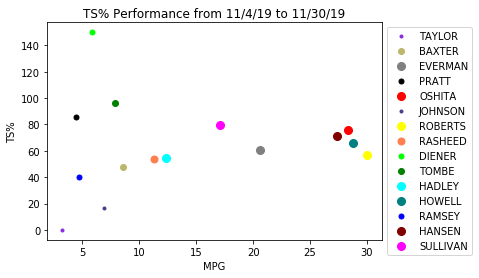

<Figure size 2880x1440 with 0 Axes>

In [10]:
fig=plt.figure()
for _, row in df.iterrows():
    plt.plot(row["MPG"], row["TS%"], 'o', ms=row.GP,
             label=row.Last, c=colors_lst[_])
plt.xlabel("MPG"),plt.ylabel('TS%'),plt.title("TS% Performance from 11/4/19 to 11/30/19")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.figure(figsize=(40,20))
fig.savefig('MBB_TS%_11_4', bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=180)

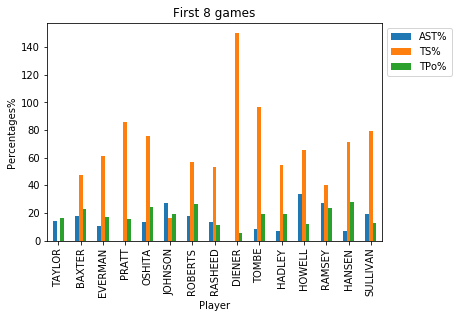

In [11]:
df.plot(x="Last", y=["AST%","TS%","TPo%"], kind="bar")
plt.xlabel("Player"),plt.ylabel('Percentages%'),plt.title("First 8 games")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
# plt.savefig('MBB_ast%_ts_usg_wo44.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=130)

<Figure size 2880x1440 with 0 Axes>

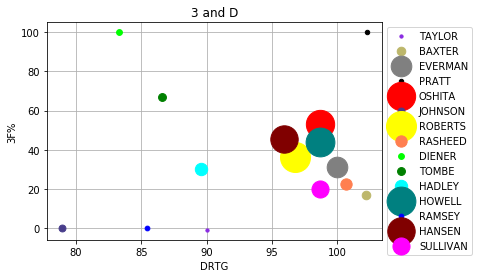

<Figure size 2880x1440 with 0 Axes>

In [12]:
fig=plt.figure()
for _, row in df.iterrows():
    plt.plot(row["DRTG"], row["3F%"], 'o',ms=row.MPG,
             label=row.Last, c=colors_lst[_])
plt.xlabel("DRTG"),plt.ylabel('3F%'),plt.title("3 and D")
plt.grid(True)
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.figure(figsize=(40,20))
# fig.savefig('3_D', bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=180)

In [170]:
# df['3PER'] = df['3F%'].mul(df['3FR']).div(100)

In [171]:
# fig=plt.figure()
# for _, row in df.iterrows():
#     plt.plot(row["DRTG"], row["3PER"], 'o',ms=row.MPG,
#              label=row.Last, c=colors_lst[_])
# plt.xlabel("DRTG"),plt.ylabel('3PER'),plt.title("3 and D")
# plt.grid(True)
# lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
# plt.figure(figsize=(40,20))
# fig.savefig('3PER_D', bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=180)

In [172]:
# df['3FGM']=df['3FR'].mul(df['Pts']).div(100)

In [13]:
df

,#,Last,First,GP,Min,Pos,Pts,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,...,Pace,ORTG,DRTG,NRTG,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,MPG,PPG,PP40,PPM,FTA/FGA,FTPGM
0,0,TAYLOR,LUNDEN,3,9.72,18,0,1,0,1,0.000000,0,1,0.000000,0,0,-1.000000,0,0,-1.000000,0,1,1,1,2,...,74.10,105.56,90.00,15.56,3,0.00,16.67,0.00,0.00,100.00,0.00,0.00,0.00,6.25,4.35,-6,14.29,0.50,66.67,3.240000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,BAXTER,HUGH,6,51.42,84,18,-3,6,16,37.500000,5,10,50.000000,1,6,16.666667,5,6,83.333333,3,10,13,5,3,...,65.35,104.76,102.25,2.51,22,81.82,22.92,40.62,47.37,62.50,37.50,37.50,6.52,20.83,13.83,-2,17.86,1.67,13.64,8.570000,3.000000,14.002334,0.350058,37.500000,0.833333
2,11,EVERMAN,SCOTT,8,165.10,283,61,88,24,48,50.000000,14,16,87.500000,10,32,31.250000,3,5,60.000000,4,10,14,12,5,...,68.56,131.80,100.00,31.80,55,110.91,17.19,60.42,61.00,33.33,66.67,10.42,3.31,6.29,5.00,-4,10.34,2.40,9.09,20.637500,7.625000,14.778922,0.369473,10.416667,0.375000
3,12,PRATT,JUSTIN,5,22.27,42,12,-5,5,6,83.333333,4,5,80.000000,1,1,100.000000,1,3,33.333333,0,2,2,0,0,...,75.45,95.24,102.27,-7.03,7,171.43,15.91,91.67,85.71,83.33,16.67,50.00,0.00,8.00,4.44,-7,0.00,-1.00,0.00,4.454000,2.400000,21.553660,0.538841,50.000000,0.200000
4,14,OSHITA,CHRISTIAN,8,226.45,385,144,135,49,84,58.333333,22,33,66.666667,27,51,52.941176,19,23,82.608696,13,38,51,18,12,...,68.01,132.73,98.69,34.04,107,134.58,24.43,74.40,75.79,39.29,60.71,27.38,7.39,18.27,13.28,-7,13.14,1.50,11.21,28.306250,18.000000,25.436079,0.635902,27.380952,2.375000
5,15,JOHNSON,JEREMY,3,20.63,35,2,6,1,6,16.666667,1,4,25.000000,0,2,0.000000,0,0,-1.000000,2,0,2,3,2,...,67.85,102.86,78.95,23.91,8,25.00,19.51,16.67,16.67,66.67,33.33,0.00,11.76,0.00,5.41,1,27.27,1.50,25.00,6.876667,0.666667,3.877848,0.096946,0.000000,0.000000
6,2,ROBERTS,TYRELL,8,239.90,404,127,138,48,108,44.444444,24,42,57.142857,24,66,36.363636,7,9,77.777778,2,18,20,27,11,...,67.36,131.93,96.81,35.12,123,103.25,26.68,55.56,56.70,38.89,61.11,8.33,1.08,7.86,4.82,-7,18.12,2.45,8.94,29.987500,15.875000,21.175490,0.529387,8.333333,0.875000
7,23,RASHEED,KADEN,7,79.12,131,15,9,5,12,41.666667,3,3,100.000000,2,9,22.222222,3,5,60.000000,2,9,11,6,3,...,66.23,116.79,100.70,16.09,17,88.24,11.49,50.00,53.57,25.00,75.00,41.67,3.12,13.04,8.27,-5,13.33,2.00,17.65,11.302857,2.142857,7.583418,0.189585,41.666667,0.428571
8,24,DIENER,JOHN,5,29.18,53,6,2,2,2,100.000000,0,0,-1.000000,2,2,100.000000,0,0,-1.000000,0,5,5,0,1,...,72.64,88.68,83.33,5.35,3,200.00,5.36,150.00,150.00,0.00,100.00,0.00,0.00,13.16,8.20,-10,0.00,0.00,33.33,5.836000,1.200000,8.224812,0.205620,0.000000,0.000000
9,25,TOMBE,MARTIN,6,47.27,80,27,18,8,11,72.727273,2,2,100.000000,6,9,66.666667,5,6,83.333333,0,11,11,2,3,...,67.70,111.25,86.59,24.66,17,158.82,18.89,100.00,96.43,18.18,81.82,54.55,0.00,20.37,12.09,-4,8.70,0.67,17.65,7.878333,4.500000,22.847472,0.571187,54.545455,0.833333


<Figure size 2880x1440 with 0 Axes>

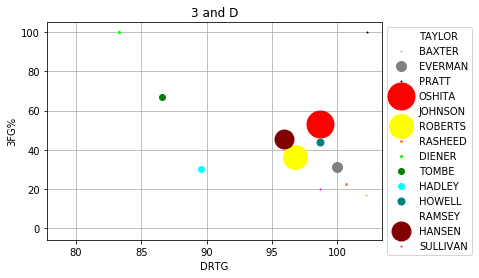

<Figure size 2880x1440 with 0 Axes>

In [14]:
fig=plt.figure()
for _, row in df.iterrows():
    plt.plot(row["DRTG"], row["3F%"], 'o',ms=row['3FM'],
             label=row.Last, c=colors_lst[_])
plt.xlabel("DRTG"),plt.ylabel('3FG%'),plt.title("3 and D")
plt.grid(True)
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.figure(figsize=(40,20))
# fig.savefig('3fg%_DRTG', bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=180)

This Plot is my attempt to find 3 and D players, people who shoot mainly 3 point shots and make them at a good percentage, and have a defensive rating of less than 100. From the plot above, we can see the y-axis is the 3 point field goal perentage, x-axis is the player defensive ratings, and the size of the point is determined by the amount of 3 point field goals that player has made. This is plot has shown me that Hadley, Tombe, Roberts, and Hansen seem to be the most likely to be 3 and D defenders but this is not the case all the time. Hansen in particular is versitile and most of his shots come from a good mix of FT,2FG, and 3PFG, while he is our center he does play a lot around the perimeter contesting shots as well, but most of his DRTG is from his rim protection and thus he is not a true 3 and D perimeter defender. As for Tombe I am not sure exactly where is fits in the team's offensive schemes but he is defintely right now taking most his shots from 3 at a high percentage, and he defends multiple positions very well. Hadley is in my opinon the most fitting of a 3 and D player.

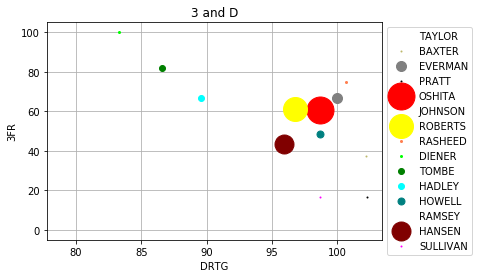

<Figure size 2880x1440 with 0 Axes>

In [15]:
fig=plt.figure()
for _, row in df.iterrows():
    plt.plot(row["DRTG"], row["3FR"], 'o',ms=row['3FM'],
             label=row.Last, c=colors_lst[_])
plt.xlabel("DRTG"),plt.ylabel('3FR'),plt.title("3 and D")
plt.grid(True)
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
pt = plt.figure(figsize=(40,20))
# fig.savefig('3_D', bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=180)

<Figure size 2880x1440 with 0 Axes>

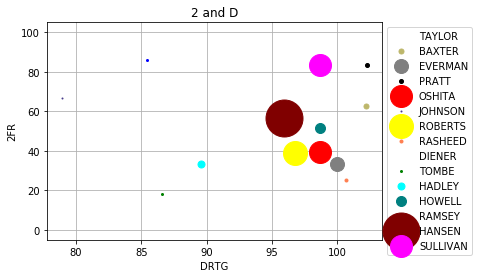

<Figure size 2880x1440 with 0 Axes>

In [16]:
fig=plt.figure()
for _, row in df.iterrows():
    plt.plot(row["DRTG"], row["2FR"], 'o',ms=row['2FM'],
             label=row.Last, c=colors_lst[_])
plt.xlabel("DRTG"),plt.ylabel('2FR'),plt.title("2 and D")
plt.grid(True)
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.figure(figsize=(40,20))
# fig.savefig('3_D', bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=180)

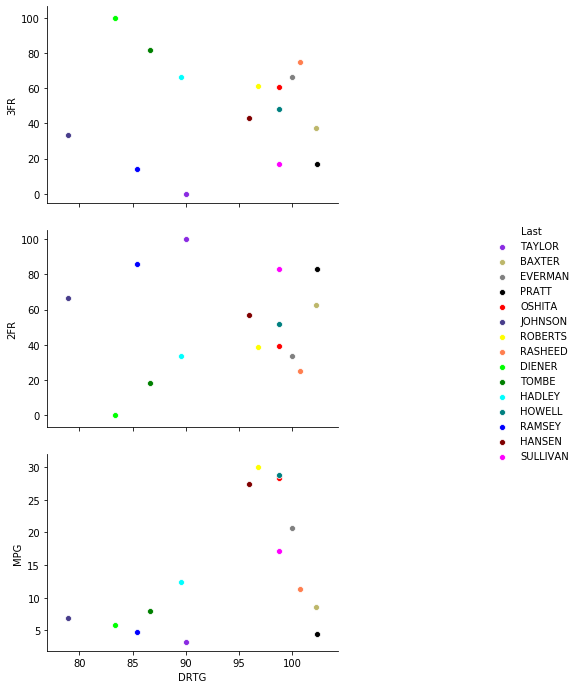

In [17]:
g = sns.pairplot(df, y_vars=["3FR","2FR","MPG"], x_vars=["DRTG"],hue = 'Last',palette=colors_lst)
g.fig.set_size_inches(10,10)
# g.fig.savefig('3_2_D', bbox_inches='tight',dpi=180)

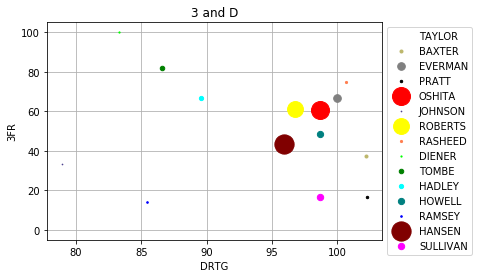

<Figure size 2880x1440 with 0 Axes>

In [18]:
fig=plt.figure()
for _, row in df.iterrows():
    plt.plot(row["DRTG"], row["3FR"], 'o',ms=row['PPG'],
             label=row.Last, c=colors_lst[_])
plt.xlabel("DRTG"),plt.ylabel('3FR'),plt.title("3 and D")
plt.grid(True)
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
pt = plt.figure(figsize=(40,20))
# fig.savefig('PPG_DRTG_3FR', bbox_inches='tight',dpi=180)

In [24]:
# This stat is a my way to determine balanced scorers/versatile by taking the difference of each player's 
# 2FR and 3FR stats from Hoopsiq website, the closer the value is too 1 the player is mainly a player who
# loves too be inside the arc and take 2point field goals, and vice versa if the player.

df['SB'] = df['2FR'].sub(df['3FR']).div(10)
df['SBRAW'] = df['2FR'].sub(df['3FR'])
df['PPP'] = df['Pts'].div(df['Pos'])
df['PPM'] = df['Pts'].div(df['Min'])

<Figure size 2880x1440 with 0 Axes>

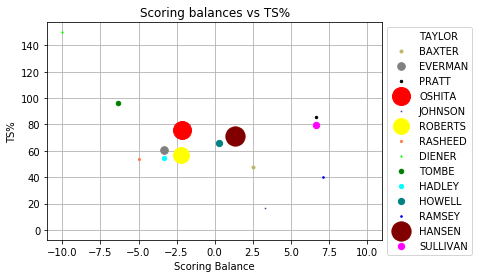

<Figure size 2880x1440 with 0 Axes>

In [20]:
sb_fig_first8gms = plt.figure()
for _, row in df.iterrows():
    plt.plot(row["SB"], row["TS%"], 'o',ms=row['PPG'],
             label=row.Last, c=colors_lst[_])
plt.xlabel("Scoring Balance"),plt.ylabel('TS%'),plt.title("Scoring balances vs TS%")
plt.grid(True)
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.figure(figsize=(40,20))
# fig.savefig('sb_fig_first8gms', bbox_inches='tight',dpi=180)

<Figure size 2880x1440 with 0 Axes>

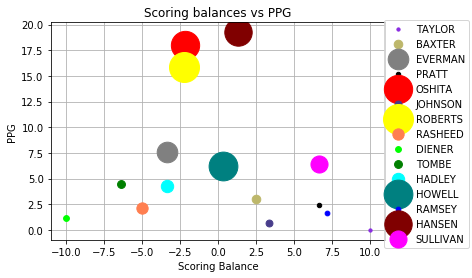

<Figure size 2880x1440 with 0 Axes>

In [21]:
sbMPG_fig_first8gms = plt.figure()
for _, row in df.iterrows():
    plt.plot(row["SB"], row["PPG"], 'o',ms=row['MPG'],
             label=row.Last, c=colors_lst[_])
plt.xlabel("Scoring Balance"),plt.ylabel('PPG'),plt.title("Scoring balances vs PPG")
plt.grid(True)
sbMPG_fig_first8gms.legend(loc='center left', bbox_to_anchor=(0.877,0.5))
plt.figure(figsize=(40,20))
# sbMPG_fig_first8gms.savefig('sbMPG_fig_first8gms', bbox_inches='tight',dpi=180)

<Figure size 2880x2880 with 0 Axes>

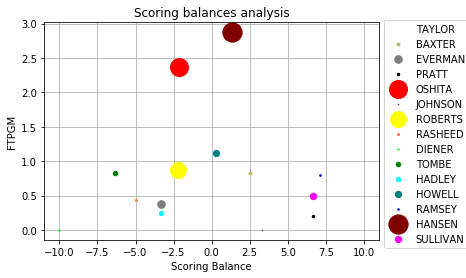

<Figure size 2880x2880 with 0 Axes>

In [22]:
sba_fig_first8gms = plt.figure()
for _, row in df.iterrows():
    plt.plot(row["SB"], row["FTPGM"], 'o',ms=row['PPG'],
             label=row.Last, c=colors_lst[_])
plt.xlabel("Scoring Balance"),plt.ylabel('FTPGM'),plt.title("Scoring balances analysis")
plt.grid(True)
sba_fig_first8gms.legend(loc='center left', bbox_to_anchor=(0.877,0.5))
plt.figure(figsize=(40,40))
# sba_fig_first8gms.savefig('sba_fig_first8gms', bbox_inches='tight',dpi=180)

<Figure size 2880x2880 with 0 Axes>

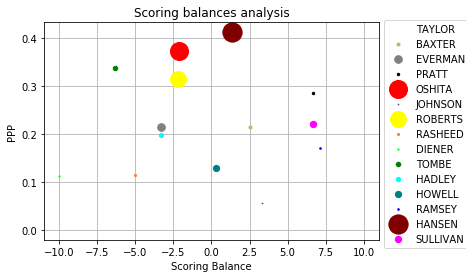

<Figure size 2880x2880 with 0 Axes>

In [26]:
sba_fig_first8gms = plt.figure()
for _, row in df.iterrows():
    plt.plot(row["SB"], row["PPP"], 'o',ms=row['PPG'],
             label=row.Last, c=colors_lst[_])
plt.xlabel("Scoring Balance"),plt.ylabel('PPP'),plt.title("Scoring balances analysis")
plt.grid(True)
sba_fig_first8gms.legend(loc='center left', bbox_to_anchor=(0.877,0.5))
plt.figure(figsize=(40,40))
# sba_fig_first8gms.savefig('sba_fig_first8gms', bbox_inches='tight',dpi=180)

### GAMES WITHOUT CHRIS

In [27]:
df2 = pd.read_excel('HoopsIQ _GMS_with_chris_AdvancedStats.xlsx', sheet_name='GMS_No_Chris')

In [28]:
df2 = df2.round({'Min': 2,'Pace':2,'ORTG':2,'DRTG':2,'NRTG':2,'TPE':2,'TPo%':2,'eFG%':2,'TS%':2,'2FR':2,'3FR':2,'FTR':2,'ORB%':2,'DRB%':2,'REB%':2,'ORbD':2,'AST%':2,'ATR':2,'TO%':2})

In [98]:
df2['MPG'] = df2.Min.div(df2.GP, axis=0)
df2['PPG'] =  df2.Pts / df2.GP
df2['PP40'] = 40*df2.Pts / df2.Min
df2['PPM'] = df2.Pts / df2.Min
df2['SB'] = df2['2FR'].sub(df2['3FR']).div(10)
df2['SBRAW'] = df2['2FR'].sub(df2['3FR'])
df2['PPP'] = df2['Pts'].div(df2['Pos'])
df2['PPM'] = df2['Pts'].div(df2['Min'])
df2['POSPGM'] = df2['Pos'].div(df2['GP'])
df2['FTAPGM'] = df2.FTA / df2.GP
df2['APG'] = df2.Ast / df2.GP

df2

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,Pts.1,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG,PP40,PPM,SB,SBRAW,PPP,POSPGM,%FGA,FTAPGM,APG
0,1,BAXTER,HUGH,4,28.30,45,63.60,128.89,124.39,4.50,3,3,100.00,6.00,75.00,75.00,0.00,100.00,0.00,0.00,0.00,0.00,0,11.11,2.00,33.33,3,7,1,2,50.000000,0,0,-1.000000,1,2,50.000000,0,0,-1.000000,0,0,0,2,1,0,0,4,7.0750,0.750000,4.240283,0.106007,-10.000,-100.00,0.066667,11.250000,0.917431,0.00,0.50
1,10,PETERSON,CONNOR,2,9.68,13,53.70,30.77,100.00,-69.23,2,5,40.00,38.46,0.00,25.00,100.00,0.00,66.67,0.00,0.00,0.00,-3,0.00,0.00,20.00,2,-11,0,3,0.000000,0,3,0.000000,0,0,-1.000000,2,2,100.000000,0,0,0,0,1,1,0,2,4.8400,1.000000,8.264463,0.206612,10.000,100.00,0.153846,6.500000,1.376147,1.00,0.00
2,11,EVERMAN,SCOTT,4,101.83,168,65.99,116.67,105.85,10.82,27,31,87.10,17.03,48.00,50.00,40.00,60.00,16.00,6.76,9.59,8.16,-1,7.14,1.00,12.90,27,15,10,25,40.000000,6,10,60.000000,4,15,26.666667,3,4,75.000000,5,7,12,4,4,3,1,6,25.4575,6.750000,10.605912,0.265148,-2.000,-20.00,0.160714,42.000000,11.467890,1.00,1.00
3,14,OSHITA,CHRISTIAN,4,135.62,220,64.89,117.73,102.29,15.43,71,65,109.23,26.64,57.69,61.21,44.23,55.77,25.00,7.07,20.88,13.68,5,4.41,0.43,10.77,71,36,25,52,48.076923,15,23,65.217391,10,29,34.482759,11,13,84.615385,7,19,26,3,7,4,0,14,33.9050,17.750000,20.940864,0.523522,-1.154,-11.54,0.322727,55.000000,23.853211,3.25,0.75
4,2,ROBERTS,TYRELL,4,140.42,233,66.37,115.02,103.85,11.18,69,68,101.47,26.67,51.82,56.56,34.55,65.45,21.82,0.95,10.10,5.39,3,24.29,2.43,10.29,69,25,22,55,40.000000,9,19,47.368421,13,36,36.111111,12,12,100.000000,1,10,11,17,7,1,1,6,35.1050,17.250000,19.655320,0.491383,-3.090,-30.90,0.296137,58.250000,25.229358,3.00,4.25
5,23,RASHEED,KADEN,3,15.90,23,57.86,100.00,108.00,-8.00,2,3,66.67,11.54,50.00,50.00,100.00,0.00,0.00,0.00,13.33,6.90,-1,0.00,0.00,33.33,2,-4,1,2,50.000000,1,2,50.000000,0,0,-1.000000,0,0,-1.000000,0,2,2,0,1,1,0,0,5.3000,0.666667,5.031447,0.125786,10.000,100.00,0.086957,7.666667,0.917431,0.00,0.00
6,24,DIENER,JOHN,1,5.35,8,59.81,100.00,137.50,-37.50,0,1,0.00,12.50,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,-1,0.00,-1.00,0.00,0,-3,0,1,0.000000,0,0,-1.000000,0,1,0.000000,0,0,-1.000000,0,0,0,0,0,0,0,0,5.3500,0.000000,0.000000,0.000000,-10.000,-100.00,0.000000,8.000000,0.458716,0.00,0.00
7,25,TOMBE,MARTIN,3,12.30,18,58.54,83.33,126.32,-42.98,2,3,66.67,15.00,0.00,50.00,0.00,100.00,300.00,12.50,0.00,5.56,-2,0.00,0.00,33.33,2,-9,0,1,0.000000,0,0,-1.000000,0,1,0.000000,2,3,66.666667,1,0,1,0,1,0,0,2,4.1000,0.666667,6.504065,0.162602,-10.000,-100.00,0.111111,6.000000,0.458716,1.00,0.00
8,3,HADLEY,GABE,4,87.47,138,63.11,123.19,105.76,17.43,44,32,137.50,20.78,71.43,75.86,10.71,89.29,14.29,0.00,13.11,6.02,1,11.90,1.67,9.38,44,23,14,28,50.000000,2,3,66.666667,12,25,48.000000,4,4,100.000000,0,8,8,5,3,3,0,5,21.8675,11.000000,20.121184,0.503030,-7.858,-78.58,0.318841,34.500000,12.844037,1.00,1.25
9,32,HOWELL,MIKEY,4,141.87,231,65.13,125.54,103.46,22.08,34,33,103.03,13.04,71.43,70.83,52.38,47.62,28.57,5.10,8.25,6.67,-1,32.95,3.22,27.27,34,51,12,21,57.142857,6,11,54.545455,6,10,60.000000,4,6,66.666667,5,8,13,29,9,10,1,7,35.4675,8.500000,9.586241,0.239656,0.476,4.76,0.147186,57.750000,9.633028,1.50,7.25


In [99]:
# new_fig = plt.figure()
# for _, row in df2.iterrows():
#     plt.plot(row["SB"], row["PPP"], 'o',ms=row['POSPG'],
#              label=row.Last, c=colors_lst[_])
# plt.xlabel("Scoring Balance"),plt.ylabel('PPP'),plt.title("Scoring balances analysis")
# plt.grid(True)
# new_fig.legend(loc='center left', bbox_to_anchor=(0.877,0.5))
# plt.figure(figsize=(40,40))
# new_fig.savefig('Test', bbox_inches='tight',dpi=180)

In [31]:
# df2.plot(x="Last", y=["PPP","PPM","PPG"], kind="bar")
# plt.xlabel("Player"),plt.ylabel('Averages'),plt.title("12/5/19-1/1/20")

# lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
# # plt.savefig('MBB_ast%_ts_usg_wo44.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=130)

In [32]:
# sb_fig_curr=plt.figure()
# for _, row in df2.iterrows():
#     plt.plot(row["SB"], row["TS%"], 'o',ms=row['PPG'],
#              label=row.Last, c=colors_lst[_])
# plt.xlabel("Scoring Balance"),plt.ylabel('TS%'),plt.title("Scoring balances vs TS%")
# plt.grid(True)
# lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
# plt.figure(figsize=(40,20))
# sb_fig_curr.savefig('sb_fig_curr.png', bbox_inches='tight',dpi=180)


In [33]:
# sb_fig_curr

In [34]:
# sb_fig_first8gms

<Figure size 5760x5760 with 0 Axes>

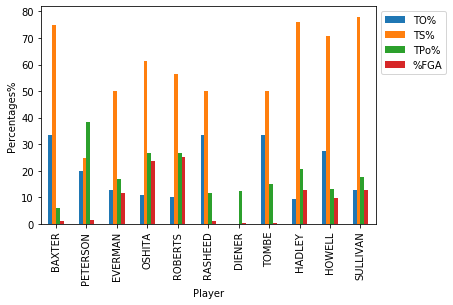

In [73]:
plt.figure(figsize=(80,80))
df2.plot(x="Last", y=["TO%","TS%","TPo%","%FGA"], kind="bar",)
plt.xlabel("Player"),plt.ylabel('Percentages%'),plt.title("")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
# plt.subplot(x='Last',y=["AST","TS%","TPo%"])
plt.savefig('TEST_.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=130)

In [53]:
df3 = pd.read_excel('HoopsIQ _GMS_with_chris_AdvancedStats.xlsx', sheet_name='TM_STATS_NoChris')
tritons_totals = df3.loc[df3['Team']=='UC San Diego']

In [71]:
# I am not sure how to abbreviate this metric
df2['%FGA']= 100*(df2.FGA/tritons_totals.FGA.values)

But this metric is supposed to give an idea of how much of the teams field goal attempts ove the past 
few games were taken by each player. It is hopefully going to give me a better picture of who takes a decent amount of our field goals and then I can compare it next to things like TS%, where as before I would have just used a boxscore number raw like FGA, but this is to give me like a slice of the pie kind of thing. 

In [72]:
df2

,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,Pts.1,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG,PP40,PPM,SB,SBRAW,PPP,POSPGM,%FGA
0,1,BAXTER,HUGH,4,28.30,45,63.60,128.89,124.39,4.50,3,3,100.00,6.00,75.00,75.00,0.00,100.00,0.00,0.00,0.00,0.00,0,11.11,2.00,33.33,3,7,1,2,50.000000,0,0,-1.000000,1,2,50.000000,0,0,-1.000000,0,0,0,2,1,0,0,4,7.0750,0.750000,4.240283,0.106007,-10.000,-100.00,0.066667,11.250000,0.917431
1,10,PETERSON,CONNOR,2,9.68,13,53.70,30.77,100.00,-69.23,2,5,40.00,38.46,0.00,25.00,100.00,0.00,66.67,0.00,0.00,0.00,-3,0.00,0.00,20.00,2,-11,0,3,0.000000,0,3,0.000000,0,0,-1.000000,2,2,100.000000,0,0,0,0,1,1,0,2,4.8400,1.000000,8.264463,0.206612,10.000,100.00,0.153846,6.500000,1.376147
2,11,EVERMAN,SCOTT,4,101.83,168,65.99,116.67,105.85,10.82,27,31,87.10,17.03,48.00,50.00,40.00,60.00,16.00,6.76,9.59,8.16,-1,7.14,1.00,12.90,27,15,10,25,40.000000,6,10,60.000000,4,15,26.666667,3,4,75.000000,5,7,12,4,4,3,1,6,25.4575,6.750000,10.605912,0.265148,-2.000,-20.00,0.160714,42.000000,11.467890
3,14,OSHITA,CHRISTIAN,4,135.62,220,64.89,117.73,102.29,15.43,71,65,109.23,26.64,57.69,61.21,44.23,55.77,25.00,7.07,20.88,13.68,5,4.41,0.43,10.77,71,36,25,52,48.076923,15,23,65.217391,10,29,34.482759,11,13,84.615385,7,19,26,3,7,4,0,14,33.9050,17.750000,20.940864,0.523522,-1.154,-11.54,0.322727,55.000000,23.853211
4,2,ROBERTS,TYRELL,4,140.42,233,66.37,115.02,103.85,11.18,69,68,101.47,26.67,51.82,56.56,34.55,65.45,21.82,0.95,10.10,5.39,3,24.29,2.43,10.29,69,25,22,55,40.000000,9,19,47.368421,13,36,36.111111,12,12,100.000000,1,10,11,17,7,1,1,6,35.1050,17.250000,19.655320,0.491383,-3.090,-30.90,0.296137,58.250000,25.229358
5,23,RASHEED,KADEN,3,15.90,23,57.86,100.00,108.00,-8.00,2,3,66.67,11.54,50.00,50.00,100.00,0.00,0.00,0.00,13.33,6.90,-1,0.00,0.00,33.33,2,-4,1,2,50.000000,1,2,50.000000,0,0,-1.000000,0,0,-1.000000,0,2,2,0,1,1,0,0,5.3000,0.666667,5.031447,0.125786,10.000,100.00,0.086957,7.666667,0.917431
6,24,DIENER,JOHN,1,5.35,8,59.81,100.00,137.50,-37.50,0,1,0.00,12.50,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,-1,0.00,-1.00,0.00,0,-3,0,1,0.000000,0,0,-1.000000,0,1,0.000000,0,0,-1.000000,0,0,0,0,0,0,0,0,5.3500,0.000000,0.000000,0.000000,-10.000,-100.00,0.000000,8.000000,0.458716
7,25,TOMBE,MARTIN,3,12.30,18,58.54,83.33,126.32,-42.98,2,3,66.67,15.00,0.00,50.00,0.00,100.00,300.00,12.50,0.00,5.56,-2,0.00,0.00,33.33,2,-9,0,1,0.000000,0,0,-1.000000,0,1,0.000000,2,3,66.666667,1,0,1,0,1,0,0,2,4.1000,0.666667,6.504065,0.162602,-10.000,-100.00,0.111111,6.000000,0.458716
8,3,HADLEY,GABE,4,87.47,138,63.11,123.19,105.76,17.43,44,32,137.50,20.78,71.43,75.86,10.71,89.29,14.29,0.00,13.11,6.02,1,11.90,1.67,9.38,44,23,14,28,50.000000,2,3,66.666667,12,25,48.000000,4,4,100.000000,0,8,8,5,3,3,0,5,21.8675,11.000000,20.121184,0.503030,-7.858,-78.58,0.318841,34.500000,12.844037
9,32,HOWELL,MIKEY,4,141.87,231,65.13,125.54,103.46,22.08,34,33,103.03,13.04,71.43,70.83,52.38,47.62,28.57,5.10,8.25,6.67,-1,32.95,3.22,27.27,34,51,12,21,57.142857,6,11,54.545455,6,10,60.000000,4,6,66.666667,5,8,13,29,9,10,1,7,35.4675,8.500000,9.586241,0.239656,0.476,4.76,0.147186,57.750000,9.633028


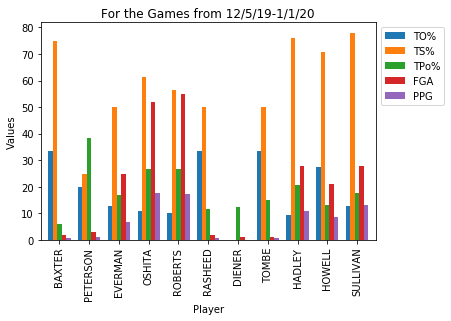

In [104]:
# plt.figure(figsize=(80,80))
df2.plot(x="Last", y=["TO%","TS%","TPo%","FGA","PPG"], kind="bar",width=.75)
plt.xlabel("Player"),plt.ylabel('Values'),plt.title("For the Games from 12/5/19-1/1/20")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
# plt.subplot(x='Last',y=["AST","TS%","TPo%"])
plt.savefig('TEST_.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=130)

In [93]:
df2


,#,Last,First,GP,Min,Pos,Pace,ORTG,DRTG,NRTG,Pts,TPos,TPE,TPo%,eFG%,TS%,2FR,3FR,FTR,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,Pts.1,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,MPG,PPG,PP40,PPM,SB,SBRAW,PPP,POSPGM,%FGA
0,1,BAXTER,HUGH,4,28.30,45,63.60,128.89,124.39,4.50,3,3,100.00,6.00,75.00,75.00,0.00,100.00,0.00,0.00,0.00,0.00,0,11.11,2.00,33.33,3,7,1,2,50.000000,0,0,-1.000000,1,2,50.000000,0,0,-1.000000,0,0,0,2,1,0,0,4,7.0750,0.750000,4.240283,0.106007,-10.000,-100.00,0.066667,11.250000,0.917431
1,10,PETERSON,CONNOR,2,9.68,13,53.70,30.77,100.00,-69.23,2,5,40.00,38.46,0.00,25.00,100.00,0.00,66.67,0.00,0.00,0.00,-3,0.00,0.00,20.00,2,-11,0,3,0.000000,0,3,0.000000,0,0,-1.000000,2,2,100.000000,0,0,0,0,1,1,0,2,4.8400,1.000000,8.264463,0.206612,10.000,100.00,0.153846,6.500000,1.376147
2,11,EVERMAN,SCOTT,4,101.83,168,65.99,116.67,105.85,10.82,27,31,87.10,17.03,48.00,50.00,40.00,60.00,16.00,6.76,9.59,8.16,-1,7.14,1.00,12.90,27,15,10,25,40.000000,6,10,60.000000,4,15,26.666667,3,4,75.000000,5,7,12,4,4,3,1,6,25.4575,6.750000,10.605912,0.265148,-2.000,-20.00,0.160714,42.000000,11.467890
3,14,OSHITA,CHRISTIAN,4,135.62,220,64.89,117.73,102.29,15.43,71,65,109.23,26.64,57.69,61.21,44.23,55.77,25.00,7.07,20.88,13.68,5,4.41,0.43,10.77,71,36,25,52,48.076923,15,23,65.217391,10,29,34.482759,11,13,84.615385,7,19,26,3,7,4,0,14,33.9050,17.750000,20.940864,0.523522,-1.154,-11.54,0.322727,55.000000,23.853211
4,2,ROBERTS,TYRELL,4,140.42,233,66.37,115.02,103.85,11.18,69,68,101.47,26.67,51.82,56.56,34.55,65.45,21.82,0.95,10.10,5.39,3,24.29,2.43,10.29,69,25,22,55,40.000000,9,19,47.368421,13,36,36.111111,12,12,100.000000,1,10,11,17,7,1,1,6,35.1050,17.250000,19.655320,0.491383,-3.090,-30.90,0.296137,58.250000,25.229358
5,23,RASHEED,KADEN,3,15.90,23,57.86,100.00,108.00,-8.00,2,3,66.67,11.54,50.00,50.00,100.00,0.00,0.00,0.00,13.33,6.90,-1,0.00,0.00,33.33,2,-4,1,2,50.000000,1,2,50.000000,0,0,-1.000000,0,0,-1.000000,0,2,2,0,1,1,0,0,5.3000,0.666667,5.031447,0.125786,10.000,100.00,0.086957,7.666667,0.917431
6,24,DIENER,JOHN,1,5.35,8,59.81,100.00,137.50,-37.50,0,1,0.00,12.50,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,-1,0.00,-1.00,0.00,0,-3,0,1,0.000000,0,0,-1.000000,0,1,0.000000,0,0,-1.000000,0,0,0,0,0,0,0,0,5.3500,0.000000,0.000000,0.000000,-10.000,-100.00,0.000000,8.000000,0.458716
7,25,TOMBE,MARTIN,3,12.30,18,58.54,83.33,126.32,-42.98,2,3,66.67,15.00,0.00,50.00,0.00,100.00,300.00,12.50,0.00,5.56,-2,0.00,0.00,33.33,2,-9,0,1,0.000000,0,0,-1.000000,0,1,0.000000,2,3,66.666667,1,0,1,0,1,0,0,2,4.1000,0.666667,6.504065,0.162602,-10.000,-100.00,0.111111,6.000000,0.458716
8,3,HADLEY,GABE,4,87.47,138,63.11,123.19,105.76,17.43,44,32,137.50,20.78,71.43,75.86,10.71,89.29,14.29,0.00,13.11,6.02,1,11.90,1.67,9.38,44,23,14,28,50.000000,2,3,66.666667,12,25,48.000000,4,4,100.000000,0,8,8,5,3,3,0,5,21.8675,11.000000,20.121184,0.503030,-7.858,-78.58,0.318841,34.500000,12.844037
9,32,HOWELL,MIKEY,4,141.87,231,65.13,125.54,103.46,22.08,34,33,103.03,13.04,71.43,70.83,52.38,47.62,28.57,5.10,8.25,6.67,-1,32.95,3.22,27.27,34,51,12,21,57.142857,6,11,54.545455,6,10,60.000000,4,6,66.666667,5,8,13,29,9,10,1,7,35.4675,8.500000,9.586241,0.239656,0.476,4.76,0.147186,57.750000,9.633028


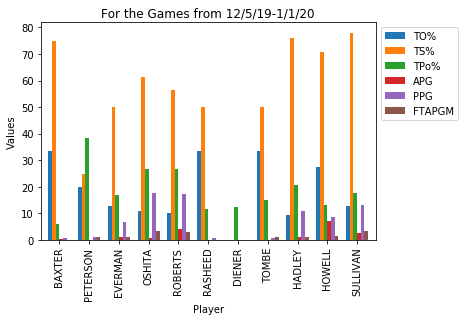

In [103]:
# plt.figure(figsize=(80,80))
df2.plot(x="Last", y=["TO%","TS%","TPo%","APG","PPG","FTAPGM"], kind="bar",width=.75)
plt.xlabel("Player"),plt.ylabel('Values'),plt.title("For the Games from 12/5/19-1/1/20")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
# plt.subplot(x='Last',y=["AST","TS%","TPo%"])
plt.savefig('ANOTHAONE_.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=130)

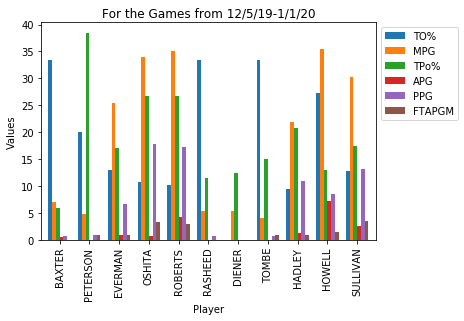

In [102]:
df2.plot(x="Last", y=["TO%","MPG","TPo%","APG","PPG","FTAPGM"], kind="bar",width=.75)
plt.xlabel("Player"),plt.ylabel('Values'),plt.title("For the Games from 12/5/19-1/1/20")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
# plt.subplot(x='Last',y=["AST","TS%","TPo%"])
# plt.savefig('ANOTHAONE_.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=130)